In [1]:
echo "# Twitter-Data-Analysis" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/Apurva-Deore/Twitter-Data-Analysis.git
git push -u origin main
                

SyntaxError: invalid syntax (<ipython-input-1-4f5b2bfe415f>, line 1)

In [65]:
import os
import tweepy as tw
import pandas as pd

In [66]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [67]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [68]:
# Define the search term and the date_since date as variables
search_words = "#Unemployment India"
date_since = "2019-11-30"

In [69]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)
#.items(5) will return 5 of the most recent tweets.
tweets

In [70]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

#KamalNath: #MadhyaPradesh is becoming a #Rape, #Unemployment and painful for farmer capital in #India. It is in fr… https://t.co/FlMymcJXLq
#KamalNath: #MadhyaPradesh is becoming a rape, #unemployment and painful for #farmer capital in India. It is in fro… https://t.co/VO6F20oVba
Labour reforms likely to result into large scale unemployment in Gujarat: GMS https://t.co/XOfBEmu90M #Gujarat… https://t.co/coV4DqPThC
@RadheMaaa in @BiggBoss House
Can understand the extent of unemployment in India Now.

Now these people also don't… https://t.co/RxxQYSQFaf
RT @ficci_india: Is #Unemployment a bigger challenge in India or #Unemployability? Find out what Mr Manish Sabharwal, Chairman, @TeamLease…


In [71]:
# ABOVE CODE can be replaced by Python List. Collect a list of tweets
[tweet.text for tweet in tweets]


[]

In [72]:
new_search = search_words + " -filter:retweets"
new_search


'#Unemployment India -filter:retweets'

In [74]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(5)

[tweet.text for tweet in tweets]

['#KamalNath: #MadhyaPradesh is becoming a #Rape, #Unemployment and painful for farmer capital in #India. It is in fr… https://t.co/FlMymcJXLq',
 '#KamalNath: #MadhyaPradesh is becoming a rape, #unemployment and painful for #farmer capital in India. It is in fro… https://t.co/VO6F20oVba',
 'Labour reforms likely to result into large scale unemployment in Gujarat: GMS https://t.co/XOfBEmu90M #Gujarat… https://t.co/coV4DqPThC',
 "@RadheMaaa in @BiggBoss House\nCan understand the extent of unemployment in India Now.\n\nNow these people also don't… https://t.co/RxxQYSQFaf",
 'The actual power lies with the local government, but we are terrified to face our local leaders. As a solution to o… https://t.co/pY9fok5D9l']

# Who is Tweeting About Unemployment?

In [75]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(5)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['ficci_india', 'New Delhi, INDIA'],
 ['OpinionExpress', 'India'],
 ['TheDailyPioneer', ''],
 ['AdvocateIndian', ''],
 ['ankitmadaan20', 'New Delhi, India']]

# Create a Pandas Dataframe From A List of Tweet Data

In [76]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text

,user,location
0,ficci_india,"New Delhi, INDIA"
1,OpinionExpress,India
2,TheDailyPioneer,
3,AdvocateIndian,
4,ankitmadaan20,"New Delhi, India"


In [77]:
##Customizing Twitter Queries For instance, if you search for unemployment+india, Twitter will return all tweets that contain both of those words (in a row) in each tweet.

In [78]:
new_search = "#unemployment+india -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2019-11-30').items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]

['Is #Unemployment a bigger challenge in India or #Unemployability? Find out what Mr Manish Sabharwal, Chairman,… https://t.co/RiN7arig7H',
 '#KamalNath: #MadhyaPradesh is becoming a #Rape, #Unemployment and painful for farmer capital in #India. It is in fr… https://t.co/FlMymcJXLq',
 '#KamalNath: #MadhyaPradesh is becoming a rape, #unemployment and painful for #farmer capital in India. It is in fro… https://t.co/VO6F20oVba',
 'Labour reforms likely to result into large scale unemployment in Gujarat: GMS https://t.co/XOfBEmu90M #Gujarat… https://t.co/coV4DqPThC',
 "@RadheMaaa in @BiggBoss House\nCan understand the extent of unemployment in India Now.\n\nNow these people also don't… https://t.co/RxxQYSQFaf"]

# Analyze Word Frequency Counts Using Twitter Data and Tweepy in Python

In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [80]:
new_search = "#unemployment+india -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2019-11-30').items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]


['Is #Unemployment a bigger challenge in India or #Unemployability? Find out what Mr Manish Sabharwal, Chairman,… https://t.co/RiN7arig7H',
 '#KamalNath: #MadhyaPradesh is becoming a #Rape, #Unemployment and painful for farmer capital in #India. It is in fr… https://t.co/FlMymcJXLq',
 '#KamalNath: #MadhyaPradesh is becoming a rape, #unemployment and painful for #farmer capital in India. It is in fro… https://t.co/VO6F20oVba',
 'Labour reforms likely to result into large scale unemployment in Gujarat: GMS https://t.co/XOfBEmu90M #Gujarat… https://t.co/coV4DqPThC',
 "@RadheMaaa in @BiggBoss House\nCan understand the extent of unemployment in India Now.\n\nNow these people also don't… https://t.co/RxxQYSQFaf"]

In [81]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [82]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Is Unemployment a bigger challenge in India or Unemployability Find out what Mr Manish Sabharwal Chairman',
 'KamalNath MadhyaPradesh is becoming a Rape Unemployment and painful for farmer capital in India It is in fr',
 'KamalNath MadhyaPradesh is becoming a rape unemployment and painful for farmer capital in India It is in fro',
 'Labour reforms likely to result into large scale unemployment in Gujarat GMS Gujarat',
 'RadheMaaa in BiggBoss HouseCan understand the extent of unemployment in India NowNow these people also dont']

# Create List of Lower Case Words from Tweets

In [83]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['is',
  'unemployment',
  'a',
  'bigger',
  'challenge',
  'in',
  'india',
  'or',
  'unemployability',
  'find',
  'out',
  'what',
  'mr',
  'manish',
  'sabharwal',
  'chairman'],
 ['kamalnath',
  'madhyapradesh',
  'is',
  'becoming',
  'a',
  'rape',
  'unemployment',
  'and',
  'painful',
  'for',
  'farmer',
  'capital',
  'in',
  'india',
  'it',
  'is',
  'in',
  'fr']]

# Calculate and Plot Word Frequency

In [84]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('india', 64),
 ('the', 61),
 ('of', 59),
 ('unemployment', 57),
 ('in', 56),
 ('to', 43),
 ('is', 36),
 ('a', 28),
 ('and', 24),
 ('for', 24),
 ('are', 20),
 ('will', 18),
 ('you', 17),
 ('but', 13),
 ('this', 13)]

In [85]:
##You can create a Pandas Dataframe for analysis and plotting that includes only the top 15 most common words.

In [86]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,india,64
1,the,61
2,of,59
3,unemployment,57
4,in,56


In [87]:
##Horizontal bar graph of the top 15 most common words in the tweets as shown below.

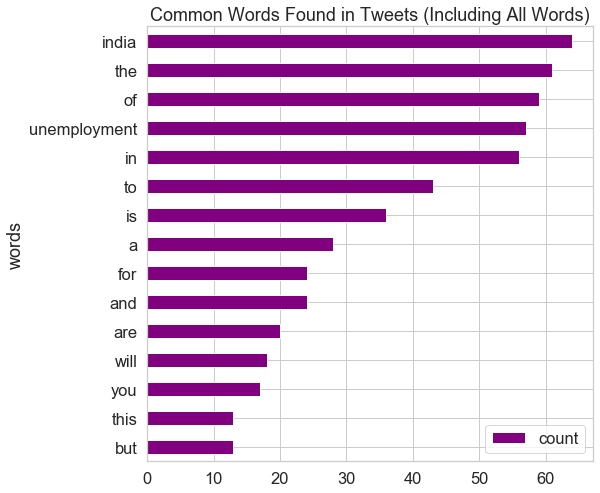

In [88]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

# Remove Stopwords With nltk

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Apurva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


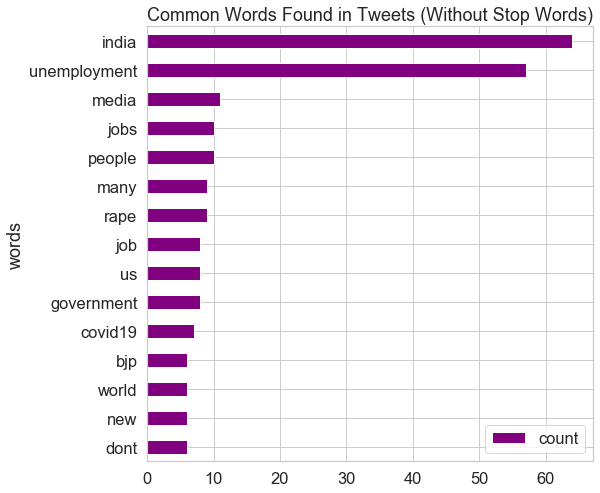

In [89]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()



# Analyze The Sentiment of Tweets From Twitter Data and Tweepy in Python

In [90]:
##Get and Analyze Tweets Related to the Unemployment in India during COVID-19

In [91]:
from textblob import TextBlob

search_term = "#unemployment+india -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-11-30').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("Is Unemployment a bigger challenge in India or Unemployability Find out what Mr Manish Sabharwal Chairman"),
 TextBlob("KamalNath MadhyaPradesh is becoming a Rape Unemployment and painful for farmer capital in India It is in fr"),
 TextBlob("KamalNath MadhyaPradesh is becoming a rape unemployment and painful for farmer capital in India It is in fro"),
 TextBlob("Labour reforms likely to result into large scale unemployment in Gujarat GMS Gujarat"),
 TextBlob("RadheMaaa in BiggBoss HouseCan understand the extent of unemployment in India NowNow these people also dont")]

In [92]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
1,-0.125000,KamalNath MadhyaPradesh is becoming a Rape Une...
2,-0.125000,KamalNath MadhyaPradesh is becoming a rape une...
3,0.107143,Labour reforms likely to result into large sca...
6,0.212121,We must look further into magic in order to un...
11,0.500000,timesofindia Pls dont cancel the contract ONE ...


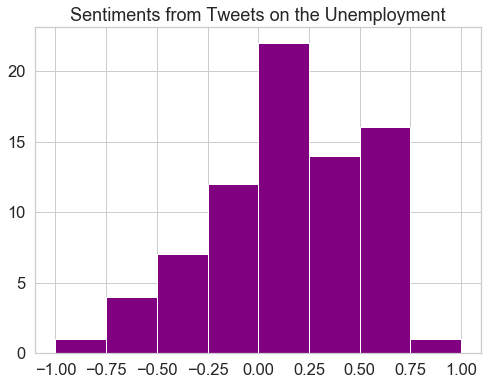

In [98]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the Unemployment")
plt.show()

In [94]:
from textblob import TextBlob

In [102]:
testimonial = TextBlob("Is Unemployment a bigger challenge in India or Unemployability Find out what Mr Manish Sabharwal Chairman")

In [103]:
testimonial.sentiment

Sentiment(polarity=0.0, subjectivity=0.5)

In [104]:
testimonial.sentiment.subjectivity

0.5

# Visualize Networks of Bigrams

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [16]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [17]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [18]:
# Create a custom search term and define the number of tweets
search_term = "#unemployment+India -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-11-30').items(1000)

In [19]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url

In [20]:
# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Apurva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('understand', 'reason'),
 ('reason', 'behind'),
 ('behind', '#unemployment'),
 ('#unemployment', '#engineers'),
 ('#engineers', 'india.'),
 ('india.', 'usually'),
 ('usually', 'interns'),
 ('interns', 'a…')]

In [22]:
# Original tweet without URLs
tweets_no_urls[0]

'\nNow  I understand the reason behind #unemployment of #engineers in India. Usually interns a… '

In [23]:
# Clean tweet 
tweets_nsw_nc[0]

['understand',
 'reason',
 'behind',
 '#unemployment',
 '#engineers',
 'india.',
 'usually',
 'interns',
 'a…']

In [24]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('farm', 'bills'), 5),
 (('bills', 'worsen'), 5),
 (('worsen', 'plight'), 5),
 (('plight', '#farmers,'), 5),
 (('#farmers,', 'resulting'), 5),
 (('resulting', 'mass'), 5),
 (('mass', '#unemployment:'), 5),
 (('#unemployment:', 'popular'), 5),
 (('popular', 'front'), 5),
 (('front', 'india…'), 5),
 (('contact', 'us'), 4),
 (('us', 'today!'), 4),
 (('.', '.'), 4),
 (('situation', 'india'), 4),
 (('#unemployment', 'bigger'), 3),
 (('bigger', 'challenge'), 3),
 (('challenge', 'india'), 3),
 (('india', '#unemployability?'), 3),
 (('#unemployability?', 'find'), 3),
 (('find', 'mr'), 3)]

In [25]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(farm, bills)",5
1,"(bills, worsen)",5
2,"(worsen, plight)",5
3,"(plight, #farmers,)",5
4,"(#farmers,, resulting)",5
5,"(resulting, mass)",5
6,"(mass, #unemployment:)",5
7,"(#unemployment:, popular)",5
8,"(popular, front)",5
9,"(front, india…)",5


# Visualize Networks of Bigrams

In [26]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [27]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)

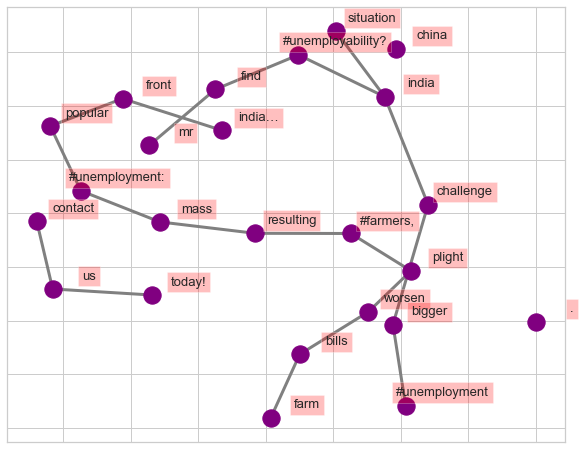

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()